<a href="https://colab.research.google.com/github/Himanshu-Dharma/Elon_bots_sentiment_analysis/blob/Lalo/tweetslalo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start


In [20]:
#Importing Librarys 
# For system related operations
import sys
#For the creation of dataframes and manipulating data
import pandas as pd
from pandas.api.types import is_numeric_dtype
# For numerical processing
import numpy as np
# For statistical analysis
import statistics
#Tweets visualization
import json
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [7]:
data = pd.read_json(open("/content/drive/MyDrive/tweets_ws22_v1.json", "r", encoding="utf8"))  

In [8]:
#Create a Dataframe of the List
df = pd.DataFrame (data)
df.head()

,source_created_at,author_id,text,source,language,longitude,latitude,id,labels,source_id
0,2020-09-18 21:56:20.798,593731316,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,{'topic': [{'tweet_id': 'acd7673f-e621-5f1a-d6...,NaN
1,2020-10-13 07:31:53.122,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,en,-0.12574,51.50853,5b92aba8-4b05-6c63-8485-e9c870742137,{'topic': [{'tweet_id': '5b92aba8-4b05-6c63-84...,NaN
2,2020-10-26 19:27:24.695,303134761,@SW_Help .And yet you have no toilets on some ...,sprinklr,en,-0.12574,51.50853,0a799c07-8b76-17ba-b840-e538d51e832d,{'topic': [{'tweet_id': '0a799c07-8b76-17ba-b8...,NaN
3,2020-10-26 19:28:49.281,303134761,@SW_Help you have no toilets on some of your t...,sprinklr,en,-0.12574,51.50853,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,{'topic': [{'tweet_id': '8b4d2a34-c4f0-0e19-40...,NaN
4,2020-09-28 11:59:41.212,56427671,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,sprinklr,en,-1.09125,50.79899,1fd08862-d8c7-0682-6b11-2603fba22d94,{'topic': [{'tweet_id': '1fd08862-d8c7-0682-6b...,NaN


In [9]:
#Percentage of missing values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df
#We might have to omit geography as most of the tweets dont have information there

,percent_missing
source_created_at,0.000000
author_id,0.000000
text,0.000000
source,0.000000
language,0.000000
longitude,91.592424
latitude,91.592424
id,0.000000
labels,0.000000
source_id,8.265974


In [10]:
data.labels[0]

{'topic': [{'tweet_id': 'acd7673f-e621-5f1a-d662-df278964a6ea',
   'user_id': 'Z003XDCS',
   'relevant': True,
   'topic': 'service',
   'ground_truth': True,
   'id': '8655353b-cc71-1e89-95d5-1c4e6bf200e1'}],
 'sentiment': [{'tweet_id': 'acd7673f-e621-5f1a-d662-df278964a6ea',
   'user_id': 'Z003XDCS',
   'sentiment': 'negative',
   'ground_truth': True,
   'id': '5ee4d218-65a9-70a0-0964-a5b00e594a41'}]}

In [11]:
df.dtypes

source_created_at    datetime64[ns]
author_id                    object
text                         object
source                       object
language                     object
longitude                   float64
latitude                    float64
id                           object
labels                       object
source_id                   float64
dtype: object

In [12]:
def unpack(df, column, fillna=None):
    ret = None
    if fillna is None:
        ret = pd.concat([df, pd.DataFrame((d for idx, d in df[column].iteritems()))], axis=1)
        del ret[column]
    else:
        ret = pd.concat([df, pd.DataFrame((d for idx, d in df[column].iteritems())).fillna(fillna)], axis=1)
        del ret[column]
    return ret

df = unpack(df, 'labels', 0)
df.head()

,source_created_at,author_id,text,source,language,longitude,latitude,id,source_id,topic,sentiment
0,2020-09-18 21:56:20.798,593731316,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,NaN,[{'tweet_id': 'acd7673f-e621-5f1a-d662-df27896...,[{'tweet_id': 'acd7673f-e621-5f1a-d662-df27896...
1,2020-10-13 07:31:53.122,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,en,-0.12574,51.50853,5b92aba8-4b05-6c63-8485-e9c870742137,NaN,[{'tweet_id': '5b92aba8-4b05-6c63-8485-e9c8707...,[{'tweet_id': '5b92aba8-4b05-6c63-8485-e9c8707...
2,2020-10-26 19:27:24.695,303134761,@SW_Help .And yet you have no toilets on some ...,sprinklr,en,-0.12574,51.50853,0a799c07-8b76-17ba-b840-e538d51e832d,NaN,[{'tweet_id': '0a799c07-8b76-17ba-b840-e538d51...,[{'tweet_id': '0a799c07-8b76-17ba-b840-e538d51...
3,2020-10-26 19:28:49.281,303134761,@SW_Help you have no toilets on some of your t...,sprinklr,en,-0.12574,51.50853,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,NaN,[{'tweet_id': '8b4d2a34-c4f0-0e19-4055-dfe4af5...,[{'tweet_id': '8b4d2a34-c4f0-0e19-4055-dfe4af5...
4,2020-09-28 11:59:41.212,56427671,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,sprinklr,en,-1.09125,50.79899,1fd08862-d8c7-0682-6b11-2603fba22d94,NaN,[{'tweet_id': '1fd08862-d8c7-0682-6b11-2603fba...,[{'tweet_id': '1fd08862-d8c7-0682-6b11-2603fba...


In [13]:
topic = pd.DataFrame.from_dict(dict(df.topic),orient='index')
df1 = pd.DataFrame([x for x in topic[0]])
df1.head()

,tweet_id,user_id,relevant,topic,ground_truth,id
0,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,True,service,True,8655353b-cc71-1e89-95d5-1c4e6bf200e1
1,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,True,delays,True,8aee5c86-6e93-24d4-6d9d-d8a9f2f19cef
2,0a799c07-8b76-17ba-b840-e538d51e832d,Z003XDCS,True,toilets,True,2d54f18a-442d-b59b-9daf-0490dc64d21a
3,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,Z003XDCS,True,toilets,True,01db4b72-b21c-60f9-b627-5a47df56655a
4,1fd08862-d8c7-0682-6b11-2603fba22d94,Z003XDCS,True,seats,True,4fe5177f-8347-1726-c2e9-cc183f16d5b1


In [14]:
sentiment = pd.DataFrame.from_dict(dict(df.sentiment),orient='index')
df2 = pd.DataFrame([x for x in sentiment[0]])
df2.head()



,tweet_id,user_id,sentiment,ground_truth,id
0,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,negative,True,5ee4d218-65a9-70a0-0964-a5b00e594a41
1,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,negative,True,2f8d741f-59cf-d1ab-27f9-5537a9718f94
2,0a799c07-8b76-17ba-b840-e538d51e832d,Z003XDCS,negative,True,be479c30-17c3-220f-8eae-eaf6fc874431
3,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,Z003XDCS,negative,True,6df4ba5c-952f-732f-2a7e-4cc6f7d56f61
4,1fd08862-d8c7-0682-6b11-2603fba22d94,Z003XDCS,neutral,True,e5aa618a-c554-6bdb-cb5b-bcdadcaa4e98


In [15]:
df_new = pd.merge(df, pd.merge(df1, df2, left_index=True, right_index=True), left_index=True, right_index=True)
df_new = df_new.drop(columns=['topic_x', 'sentiment_x', 'user_id_y', 'tweet_id_y'])
df_new['source_created_at'] = pd.to_datetime(df_new['source_created_at'])
df_new

,source_created_at,author_id,text,source,language,longitude,latitude,id,source_id,tweet_id_x,user_id_x,relevant,topic_y,ground_truth_x,id_x,sentiment_y,ground_truth_y,id_y
0,2020-09-18 21:56:20.798,593731316,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,NaN,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,True,service,True,8655353b-cc71-1e89-95d5-1c4e6bf200e1,negative,True,5ee4d218-65a9-70a0-0964-a5b00e594a41
1,2020-10-13 07:31:53.122,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,en,-0.12574,51.50853,5b92aba8-4b05-6c63-8485-e9c870742137,NaN,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,True,delays,True,8aee5c86-6e93-24d4-6d9d-d8a9f2f19cef,negative,True,2f8d741f-59cf-d1ab-27f9-5537a9718f94
2,2020-10-26 19:27:24.695,303134761,@SW_Help .And yet you have no toilets on some ...,sprinklr,en,-0.12574,51.50853,0a799c07-8b76-17ba-b840-e538d51e832d,NaN,0a799c07-8b76-17ba-b840-e538d51e832d,Z003XDCS,True,toilets,True,2d54f18a-442d-b59b-9daf-0490dc64d21a,negative,True,be479c30-17c3-220f-8eae-eaf6fc874431
3,2020-10-26 19:28:49.281,303134761,@SW_Help you have no toilets on some of your t...,sprinklr,en,-0.12574,51.50853,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,NaN,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,Z003XDCS,True,toilets,True,01db4b72-b21c-60f9-b627-5a47df56655a,negative,True,6df4ba5c-952f-732f-2a7e-4cc6f7d56f61
4,2020-09-28 11:59:41.212,56427671,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,sprinklr,en,-1.09125,50.79899,1fd08862-d8c7-0682-6b11-2603fba22d94,NaN,1fd08862-d8c7-0682-6b11-2603fba22d94,Z003XDCS,True,seats,True,4fe5177f-8347-1726-c2e9-cc183f16d5b1,neutral,True,e5aa618a-c554-6bdb-cb5b-bcdadcaa4e98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16944,2019-07-11 07:34:35.000,24940900,Haha oh man the audio corruption on @TLRailUK ...,brandwatch,en-GB,NaN,NaN,b47948df-1732-7021-ee77-238f839a2ea0,1.149220e+18,b47948df-1732-7021-ee77-238f839a2ea0,Z003XDCS,True,announcements,True,aca953e8-bec4-216a-5a6e-e3530e420fa9,neutral,True,be02e403-49c2-e366-3324-09f1696ce526
16945,2020-08-10 11:19:10.181,63559912,@TLRailUK SweetIs there a plug to charge my ph...,sprinklr,en,-0.12574,51.50853,bcb3a01a-e58c-e082-3111-10fa77d1a9f7,NaN,bcb3a01a-e58c-e082-3111-10fa77d1a9f7,Z003XDCS,True,plugs,True,e170272d-5e5c-6ce7-ba7c-748aa56073d7,neutral,True,a0c0e79c-11ee-4700-45b2-dcf7234f0a10
16946,2020-08-29 09:51:10.833,277455263,@TLRailUK now there are far fewer commuters ha...,sprinklr,en,-0.12574,51.50853,f440c7e6-9e2d-31c4-3626-b9d8288cbbe3,NaN,f440c7e6-9e2d-31c4-3626-b9d8288cbbe3,Z003XDCS,True,tables,True,356eb822-07b7-ca2d-0087-56284ce2e95b,neutral,True,786bb503-8ec0-6a21-ea3f-6995ceb7e3e0
16947,2020-11-02 12:06:06.967,3050957613,@geofftech I am voting for Thameslink. 1. in a...,sprinklr,en,-0.12574,51.50853,859ab156-cad3-3bf0-4b6d-de494b483501,NaN,859ab156-cad3-3bf0-4b6d-de494b483501,Z003XDCS,True,toilets,True,3f6f4be1-37c7-17cb-56c3-2e91b0ae237a,neutral,True,399d6906-75db-1150-0f34-414c6cf917cf


In [18]:
df = df_new

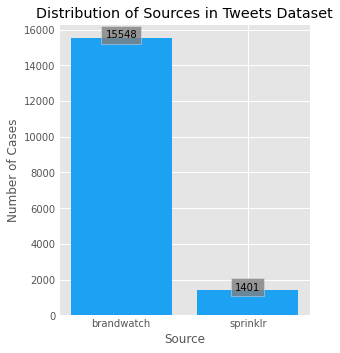

In [56]:
# Frequency distribution of source
source = df['source'].value_counts()
source  = source .rename_axis('source').reset_index(name='count')
source['source'] = source['source'].astype('category')
x, y = source['source'], source['count']
plt.figure(figsize=(4,5))
plt.style.use('ggplot')
plt.bar(x, y, color = '#1DA1F2')
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha = 'center',
    Bbox = dict(facecolor = 'grey', alpha =.8))
plt.title('Distribution of Sources in Tweets Dataset')
plt.ylabel('Number of Cases', fontsize=12)
plt.xlabel('Source', fontsize=12)
# plt.savefig('sourcecount.jpeg')

Text(0.5, 0, 'Topic')

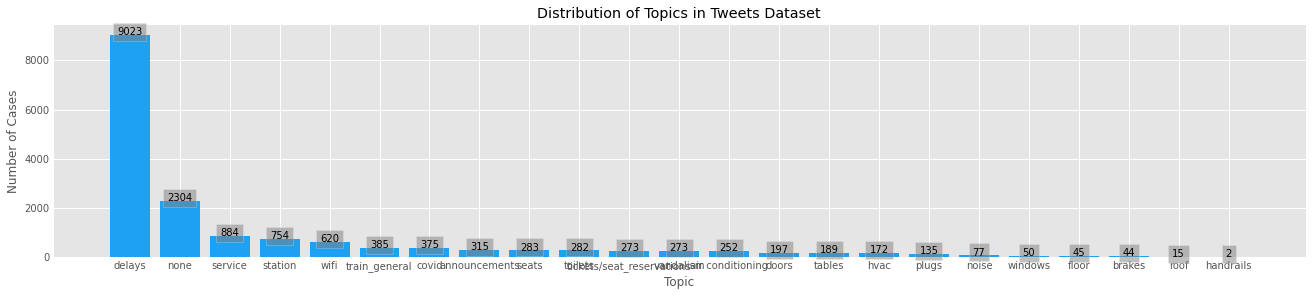

In [66]:
# Frequency distribution of topics
topic = df['topic_y'].value_counts()
topic  = topic .rename_axis('topic_y').reset_index(name='count')
topic['topic_y'] = topic['topic_y'].astype('category')
x, y = topic['topic_y'], topic['count']
plt.figure(figsize=(20,4))
plt.style.use('ggplot')
plt.bar(x, y, color = '#1DA1F2')
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha = 'center',
    Bbox = dict(facecolor = 'grey', alpha =.5))
plt.title('Distribution of Topics in Tweets Dataset')
plt.ylabel('Number of Cases', fontsize=12)
plt.xlabel('Topic', fontsize=12)
# plt.savefig('sourcecount.jpeg')

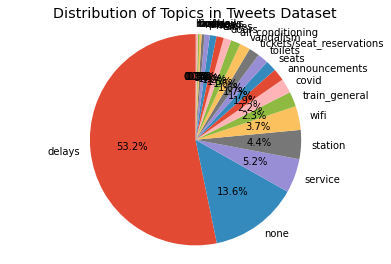

<Figure size 1080x288 with 0 Axes>

In [79]:
# Frequency distribution of topics
topic = df['topic_y'].value_counts()
topic  = topic .rename_axis('topic_y').reset_index(name='count')
topic['topic_y'] = topic['topic_y'].astype('category')
x, y = topic['topic_y'], topic['count']
fig1, ax1 = plt.subplots()
ax1.pie(y, labels=x, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')
plt.title('Distribution of Topics in Tweets Dataset')
plt.figure(figsize=(15,4))
plt.show()

Text(0.5, 0, 'Topic')

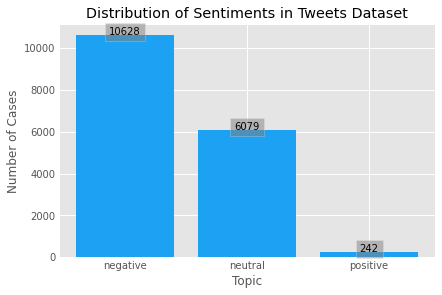

In [80]:
# Frequency distribution of sentiment
sentiment = df['sentiment_y'].value_counts()
sentiment  = sentiment .rename_axis('sentiment_y').reset_index(name='count')
sentiment['sentiment_y'] = sentiment['sentiment_y'].astype('category')
x, y = sentiment['sentiment_y'], sentiment['count']
plt.figure(figsize=(6,4))
plt.style.use('ggplot')
plt.bar(x, y, color = '#1DA1F2')
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha = 'center',
    Bbox = dict(facecolor = 'grey', alpha =.5))
plt.title('Distribution of Sentiments in Tweets Dataset')
plt.ylabel('Number of Cases', fontsize=12)
plt.xlabel('Topic', fontsize=12)
# plt.savefig('sourcecount.jpeg')